In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Files
Current_Season = "Player_Data/Champions_League_Players_19-20.csv"
Season_18_19 = "Player_Data/Champions_League_Players_18-19.csv"
Season_17_18 = "Player_Data/Champions_League_Players_17-18.csv"

In [3]:
Current_Season_df = pd.read_csv(Current_Season,encoding='latin1')
Current_Season_df.head()

,Rk,Player,Nation,Pos,Squad,MP,Starts,Min,Gls,Ast,...,G-PK,G+A-PK,xG,npxG,xA,xG4,xA5,xG+xA,npxG6,npxG+xA
0,1,Tammy Abraham,eng ENG,FW,Chelsea,7,6,487,2,1,...,0.37,0.55,3.9,3.9,0.5,0.73,0.09,0.82,0.73,0.82
1,3,Adrin,es ESP,GK,Liverpool,2,2,180,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,4,Sergio Agero,ar ARG,FW,Manchester City,3,2,196,2,0,...,0.46,0.46,2.7,1.9,0.0,1.23,0.02,1.25,0.89,0.90
3,11,Toby Alderweireld,be BEL,DF,Tottenham,5,5,450,0,0,...,0.00,0.00,0.0,0.0,0.1,0.00,0.02,0.02,0.00,0.02
4,13,Trent Alexander-Arnold,eng ENG,DF,Liverpool,6,5,462,0,1,...,0.00,0.19,0.2,0.2,1.0,0.03,0.20,0.23,0.03,0.23


In [4]:
Season_18_19_df = pd.read_csv(Season_18_19,encoding='latin1')
Season_18_19_df.head()

,Rk,Player,Nation,Pos,Squad,Born,MP,Starts,Min,Gls,...,G-PK,G+A-PK,xG,npxG,xA,xG4,xA5,xG+xA,npxG6,npxG+xA
0,3,Sergio Agero,ar ARG,FW,Manchester_City,1988,7,6,510,6,...,0.88,1.06,5.5,3.9,0.3,0.96,0.05,1.02,0.70,0.75
1,17,Toby Alderweireld,be BEL,DF,Tottenham,1989,12,12,"1,080",0,...,0.00,0.00,0.5,0.5,0.2,0.04,0.02,0.06,0.04,0.06
2,20,Trent Alexander-Arnold,eng ENG,DF,Liverpool,1998,11,11,921,0,...,0.00,0.20,0.4,0.4,2.9,0.04,0.29,0.33,0.04,0.33
3,21,Alisson,br BRA,GK,Liverpool,1992,13,13,"1,170",0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,23,Dele Alli,eng ENG,MF,Tottenham,1996,8,8,709,0,...,0.00,0.38,1.9,1.9,1.7,0.25,0.22,0.47,0.25,0.47


In [5]:
#Find null values
for column in Current_Season_df.columns:
    print(f"Column {column} has {Current_Season_df[column].isnull().sum()} null values")

Column Rk has 0 null values
Column Player has 0 null values
Column Nation has 0 null values
Column Pos has 0 null values
Column Squad has 0 null values
Column MP has 0 null values
Column Starts has 0 null values
Column Min has 0 null values
Column Gls has 0 null values
Column Ast has 0 null values
Column PK has 0 null values
Column PKatt has 0 null values
Column CrdY has 0 null values
Column CrdR has 0 null values
Column Gls2 has 0 null values
Column Ast3 has 0 null values
Column G+A has 0 null values
Column G-PK has 0 null values
Column G+A-PK has 0 null values
Column xG has 0 null values
Column npxG has 0 null values
Column xA has 0 null values
Column xG4 has 0 null values
Column xA5 has 0 null values
Column xG+xA has 0 null values
Column npxG6 has 0 null values
Column npxG+xA has 0 null values


In [6]:
#Remove Columns
Current_Season_df.drop(columns=["Rk"], axis=1, inplace=True)
Current_Season_df.head()

,Player,Nation,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,...,G-PK,G+A-PK,xG,npxG,xA,xG4,xA5,xG+xA,npxG6,npxG+xA
0,Tammy Abraham,eng ENG,FW,Chelsea,7,6,487,2,1,0,...,0.37,0.55,3.9,3.9,0.5,0.73,0.09,0.82,0.73,0.82
1,Adrin,es ESP,GK,Liverpool,2,2,180,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,Sergio Agero,ar ARG,FW,Manchester City,3,2,196,2,0,1,...,0.46,0.46,2.7,1.9,0.0,1.23,0.02,1.25,0.89,0.90
3,Toby Alderweireld,be BEL,DF,Tottenham,5,5,450,0,0,0,...,0.00,0.00,0.0,0.0,0.1,0.00,0.02,0.02,0.00,0.02
4,Trent Alexander-Arnold,eng ENG,DF,Liverpool,6,5,462,0,1,0,...,0.00,0.19,0.2,0.2,1.0,0.03,0.20,0.23,0.03,0.23


In [7]:
#expected goal
expected_goals_counts = Current_Season_df.xG.value_counts()
expected_goals_counts

0.0    28
0.1    11
0.3     8
0.2     7
0.7     5
0.6     4
0.4     4
0.8     3
1.0     2
4.6     2
0.5     2
2.2     2
2.7     1
3.5     1
1.5     1
3.8     1
3.9     1
1.4     1
1.8     1
1.2     1
0.9     1
1.7     1
1.6     1
3.7     1
Name: xG, dtype: int64

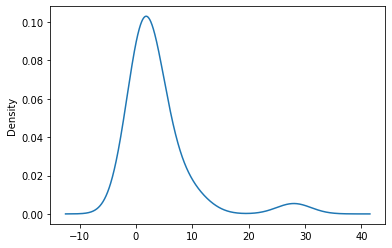

In [8]:
expected_goals_counts.plot.density()

In [9]:
#Consolidate non-performers
replace_expected_goals = list(expected_goals_counts[expected_goals_counts < 1].index)

for i in replace_expected_goals:
    Current_Season_df.xG = Current_Season_df.xG.replace(i,"Other")

In [10]:
Current_Season_df.xG.value_counts()

0.0    28
0.1    11
0.3     8
0.2     7
0.7     5
0.6     4
0.4     4
0.8     3
1.0     2
4.6     2
0.5     2
2.2     2
2.7     1
3.5     1
1.5     1
3.8     1
3.9     1
1.4     1
1.8     1
1.2     1
0.9     1
1.7     1
1.6     1
3.7     1
Name: xG, dtype: int64

In [11]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(Current_Season_df.xG.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['xG'])
encode_df.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,xG_0.0,xG_1.0,xG_2.0,xG_3.0,xG_4.0
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [12]:
# Merge the two DataFrames together and drop the APPLICATION_TYPE column
df1 = Current_Season_df.merge(encode_df,left_index=True,right_index=True).drop("xG",1)
df1

,Player,Nation,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,...,xG4,xA5,xG+xA,npxG6,npxG+xA,xG_0.0,xG_1.0,xG_2.0,xG_3.0,xG_4.0
0,Tammy Abraham,eng ENG,FW,Chelsea,7,6,487,2,1,0,...,0.73,0.09,0.82,0.73,0.82,0.0,0.0,0.0,1.0,0.0
1,Adrin,es ESP,GK,Liverpool,2,2,180,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0
2,Sergio Agero,ar ARG,FW,Manchester City,3,2,196,2,0,1,...,1.23,0.02,1.25,0.89,0.90,0.0,0.0,1.0,0.0,0.0
3,Toby Alderweireld,be BEL,DF,Tottenham,5,5,450,0,0,0,...,0.00,0.02,0.02,0.00,0.02,1.0,0.0,0.0,0.0,0.0
4,Trent Alexander-Arnold,eng ENG,DF,Liverpool,6,5,462,0,1,0,...,0.03,0.20,0.23,0.03,0.23,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Georginio Wijnaldum,nl NED,MF,Liverpool,7,4,445,1,0,0,...,0.14,0.04,0.17,0.14,0.17,1.0,0.0,0.0,0.0,0.0
86,Willian,br BRA,FW,Chelsea,7,6,530,1,1,0,...,0.17,0.31,0.48,0.17,0.48,0.0,1.0,0.0,0.0,0.0
87,Harry Winks,eng ENG,MF,Tottenham,4,4,351,0,0,0,...,0.00,0.03,0.03,0.00,0.03,1.0,0.0,0.0,0.0,0.0
88,Oleksandr Zinchenko,ua UKR,"DF,MF",Manchester City,2,1,114,0,0,0,...,0.00,0.02,0.02,0.00,0.02,1.0,0.0,0.0,0.0,0.0


In [13]:
matches_played_counts = Current_Season_df.MP.value_counts()
matches_played_counts

6    17
7    16
4    15
1    12
5    11
2    10
3     9
Name: MP, dtype: int64

In [14]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(Current_Season_df.MP.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['MP'])
encode_df.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,MP_1.0,MP_2.0,MP_3.0,MP_4.0,MP_5.0,MP_6.0,MP_7.0
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge the two DataFrames together and drop the AFFILIATION column
df2 = df1.merge(encode_df,left_index=True,right_index=True).drop("MP",1)
df2

,Player,Nation,Pos,Squad,Starts,Min,Gls,Ast,PK,PKatt,...,xG_2.0,xG_3.0,xG_4.0,MP_1.0,MP_2.0,MP_3.0,MP_4.0,MP_5.0,MP_6.0,MP_7.0
0,Tammy Abraham,eng ENG,FW,Chelsea,6,487,2,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Adrin,es ESP,GK,Liverpool,2,180,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Sergio Agero,ar ARG,FW,Manchester City,2,196,2,0,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Toby Alderweireld,be BEL,DF,Tottenham,5,450,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Trent Alexander-Arnold,eng ENG,DF,Liverpool,5,462,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Georginio Wijnaldum,nl NED,MF,Liverpool,4,445,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,Willian,br BRA,FW,Chelsea,6,530,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,Harry Winks,eng ENG,MF,Tottenham,4,351,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88,Oleksandr Zinchenko,ua UKR,"DF,MF",Manchester City,1,114,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
y = df2["Gls"].values
X = df2.drop(["Gls","Starts"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Current_Season_df['Player'] = le.fit_transform(Current_Season_df['Player'])
Current_Season_df['Squad'] = le.fit_transform(Current_Season_df['Squad'])
Current_Season_df['Starts'] = le.fit_transform(Current_Season_df['Starts'])
Current_Season_df['Pos'] = le.fit_transform(Current_Season_df['Pos'])
Current_Season_df['MP'] = le.fit_transform(Current_Season_df['MP'])
Current_Season_df['xG'] = le.fit_transform(Current_Season_df['xG'])


In [27]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Divock Origi'

In [ ]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(X_train_scaled, columns=['Player', 'Squad', 'Starts', 'Pos', 'MP', 'xG'])
transformed_scaled_data.head()

In [ ]:

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)